
## Overview

This project aims to delve into the workings of diffusion models, a class of generative models, and their application in image generation, explicitly using the CelebA dataset. A significant focus will be on understanding U-Net architectures and their role in diffusion models.

## Objectives

1. Understanding U-Net and Diffusion Models:
   - Begin with a comprehensive exploration of U-Net architectures, referencing the U-Net Paper: https://arxiv.org/abs/1505.04597.
   - Dive into the theory and mechanics of diffusion models, using resources like the Score-Based Generative Modeling Paper: https://arxiv.org/abs/2011.13456 and relevant blog posts.
   

2. Dataset Preparation:
   - Utilize the CelebA dataset, ensuring appropriate preprocessing for diffusion models.


3. Implementing Diffusion Models:
   - Implement a diffusion model suitable for generating images from the CelebA dataset. Focus on integrating U-Net as a component of the diffusion model.
   - Utilize tutorials and resources such as Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239 and the Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modeling.ipynb.


4. Generating Images with Diffusion Models:
   - Apply the implemented diffusion model to generate images from the CelebA dataset. Evaluate the quality and fidelity of the generated images.


5. Documentation:
   - Create a detailed README file outlining the project's goals, methods, and key findings.
   - Write a `REPORT.MD` that provides an in-depth explanation of U-Net architectures and diffusion models, including their mathematical and practical aspects in image generation.


6. Analysis and Results:
   - Analyze the performance of the diffusion model in generating images. Discuss any challenges encountered and how they were addressed.


## Expected Deliverables

1. Codebase: Complete Python code for implementing and training the diffusion model with U-Net architecture.
2. Generated Images: A collection of images generated from the CelebA dataset using the diffusion model.
3. Documentation:
   - `README.md`: A concise document summarizing the project’s objectives, methodology, and outcomes.
   - `REPORT.MD`: A comprehensive report detailing the theoretical background and practical implementation of U-Net and diffusion models in image generation.

## Resources and References

- U-Net Paper: https://arxiv.org/abs/1505.04597
- Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modeling.ipynb
- Score-Based Generative Modeling through Stochastic Differential Equations: https://arxiv.org/abs/2011.13456
- Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239
- Blog posts on diffusion models: Post 1: https://yang-song.net/blog/2021/score/, Post 2: https://lilianweng.github.io/posts/2021-07-11-diffusion-models/


## 1. Understanding U-Net and Diffusion Models

*Begin with a comprehensive exploration of U-Net architectures, referencing the U-Net Paper: https://arxiv.org/abs/1505.04597.*

*Dive into the theory and mechanics of diffusion models, using resources like the Score-Based Generative Modeling Paper: https://arxiv.org/abs/2011.13456 and relevant blog posts.*

### What are U-Net architectures

The U-net architecture is a specific architecture introduced by Ronneberger et al. (2015) for biological image segmentation and was lately adopted for all other kinds of tasks. It is particularly useful for image segmentations, hip resolution, and diffusion models. It's called U-net because of the U-shape shape of its architecture. 

In the original paper, the architecture is presented as follows:

<div>
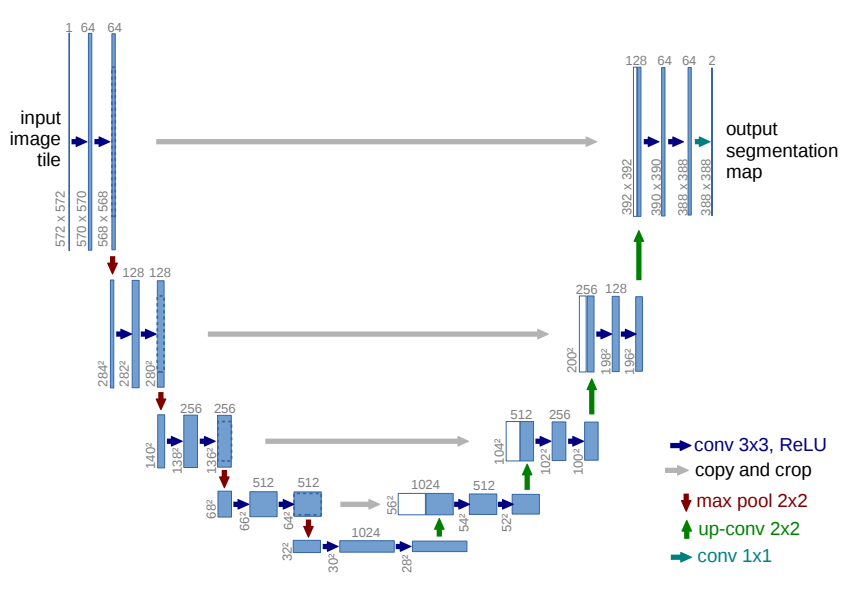
</div>


This network architecture is a convolutional neural network model that can be devided into two different phases: a contractig path and an expansive path. It is imporant to point out that both paths are symmetric.
    
The contracting path (left side of the previous image), also known as encoder, is the "descending" part. During this phase, the model extracts information about what is present in the image, to the detriment of spatial and contextual information. It follows the typical architecture of a convolutional neural network. It is made up of repeated 3x3 convolutional layers at each of the stages, each followed by a ReLU activation function that is applied to each element for each of the features.  Between the stages, a 2x2 max pooling operation is used for downsampling the features. This max pooling operation reduces the spatial dimensions of the features, so to compensate for it the channels are doubled after each downsampling.

The expansive path (right side of the previous image), also known as decode, is the "ascending" part after the contraction point of the model. The objective is to reconstruct the input using the information extracted during the contracting path. It is also composed of repeated 3x3 convolutional layers followed by a ReLU activation function. Instead of downsampling with max pooling, the decoder upsamples the current set of features. It then applies a 2x2 convolutional layer that halves the number of channels. The up sampling operation is used to restore the spational resolution of the features that were lost during the contracting phase.

Besides the encoder and decoder, thera are two other elements that are important in the U-net architecture: the bottlenet and the connecting paths. 

The Connecting paths take a copy of the features from the symmetrical part of the encoder and concatenate them onto their opposing stage in the decoder. 

The bottleneck is where the encoder switches into the decoder. First, we downsample the features with a 2x2 max pooling operation. Then we pass them through the repeated 3x3 convolutional layers followed by a ReLU activation function and we double the channels. Finally, we upsample them again to their previous resolution.

Here there is a simplified U-Net drawing that I made to make the distinction between this four element clearer:





<div>
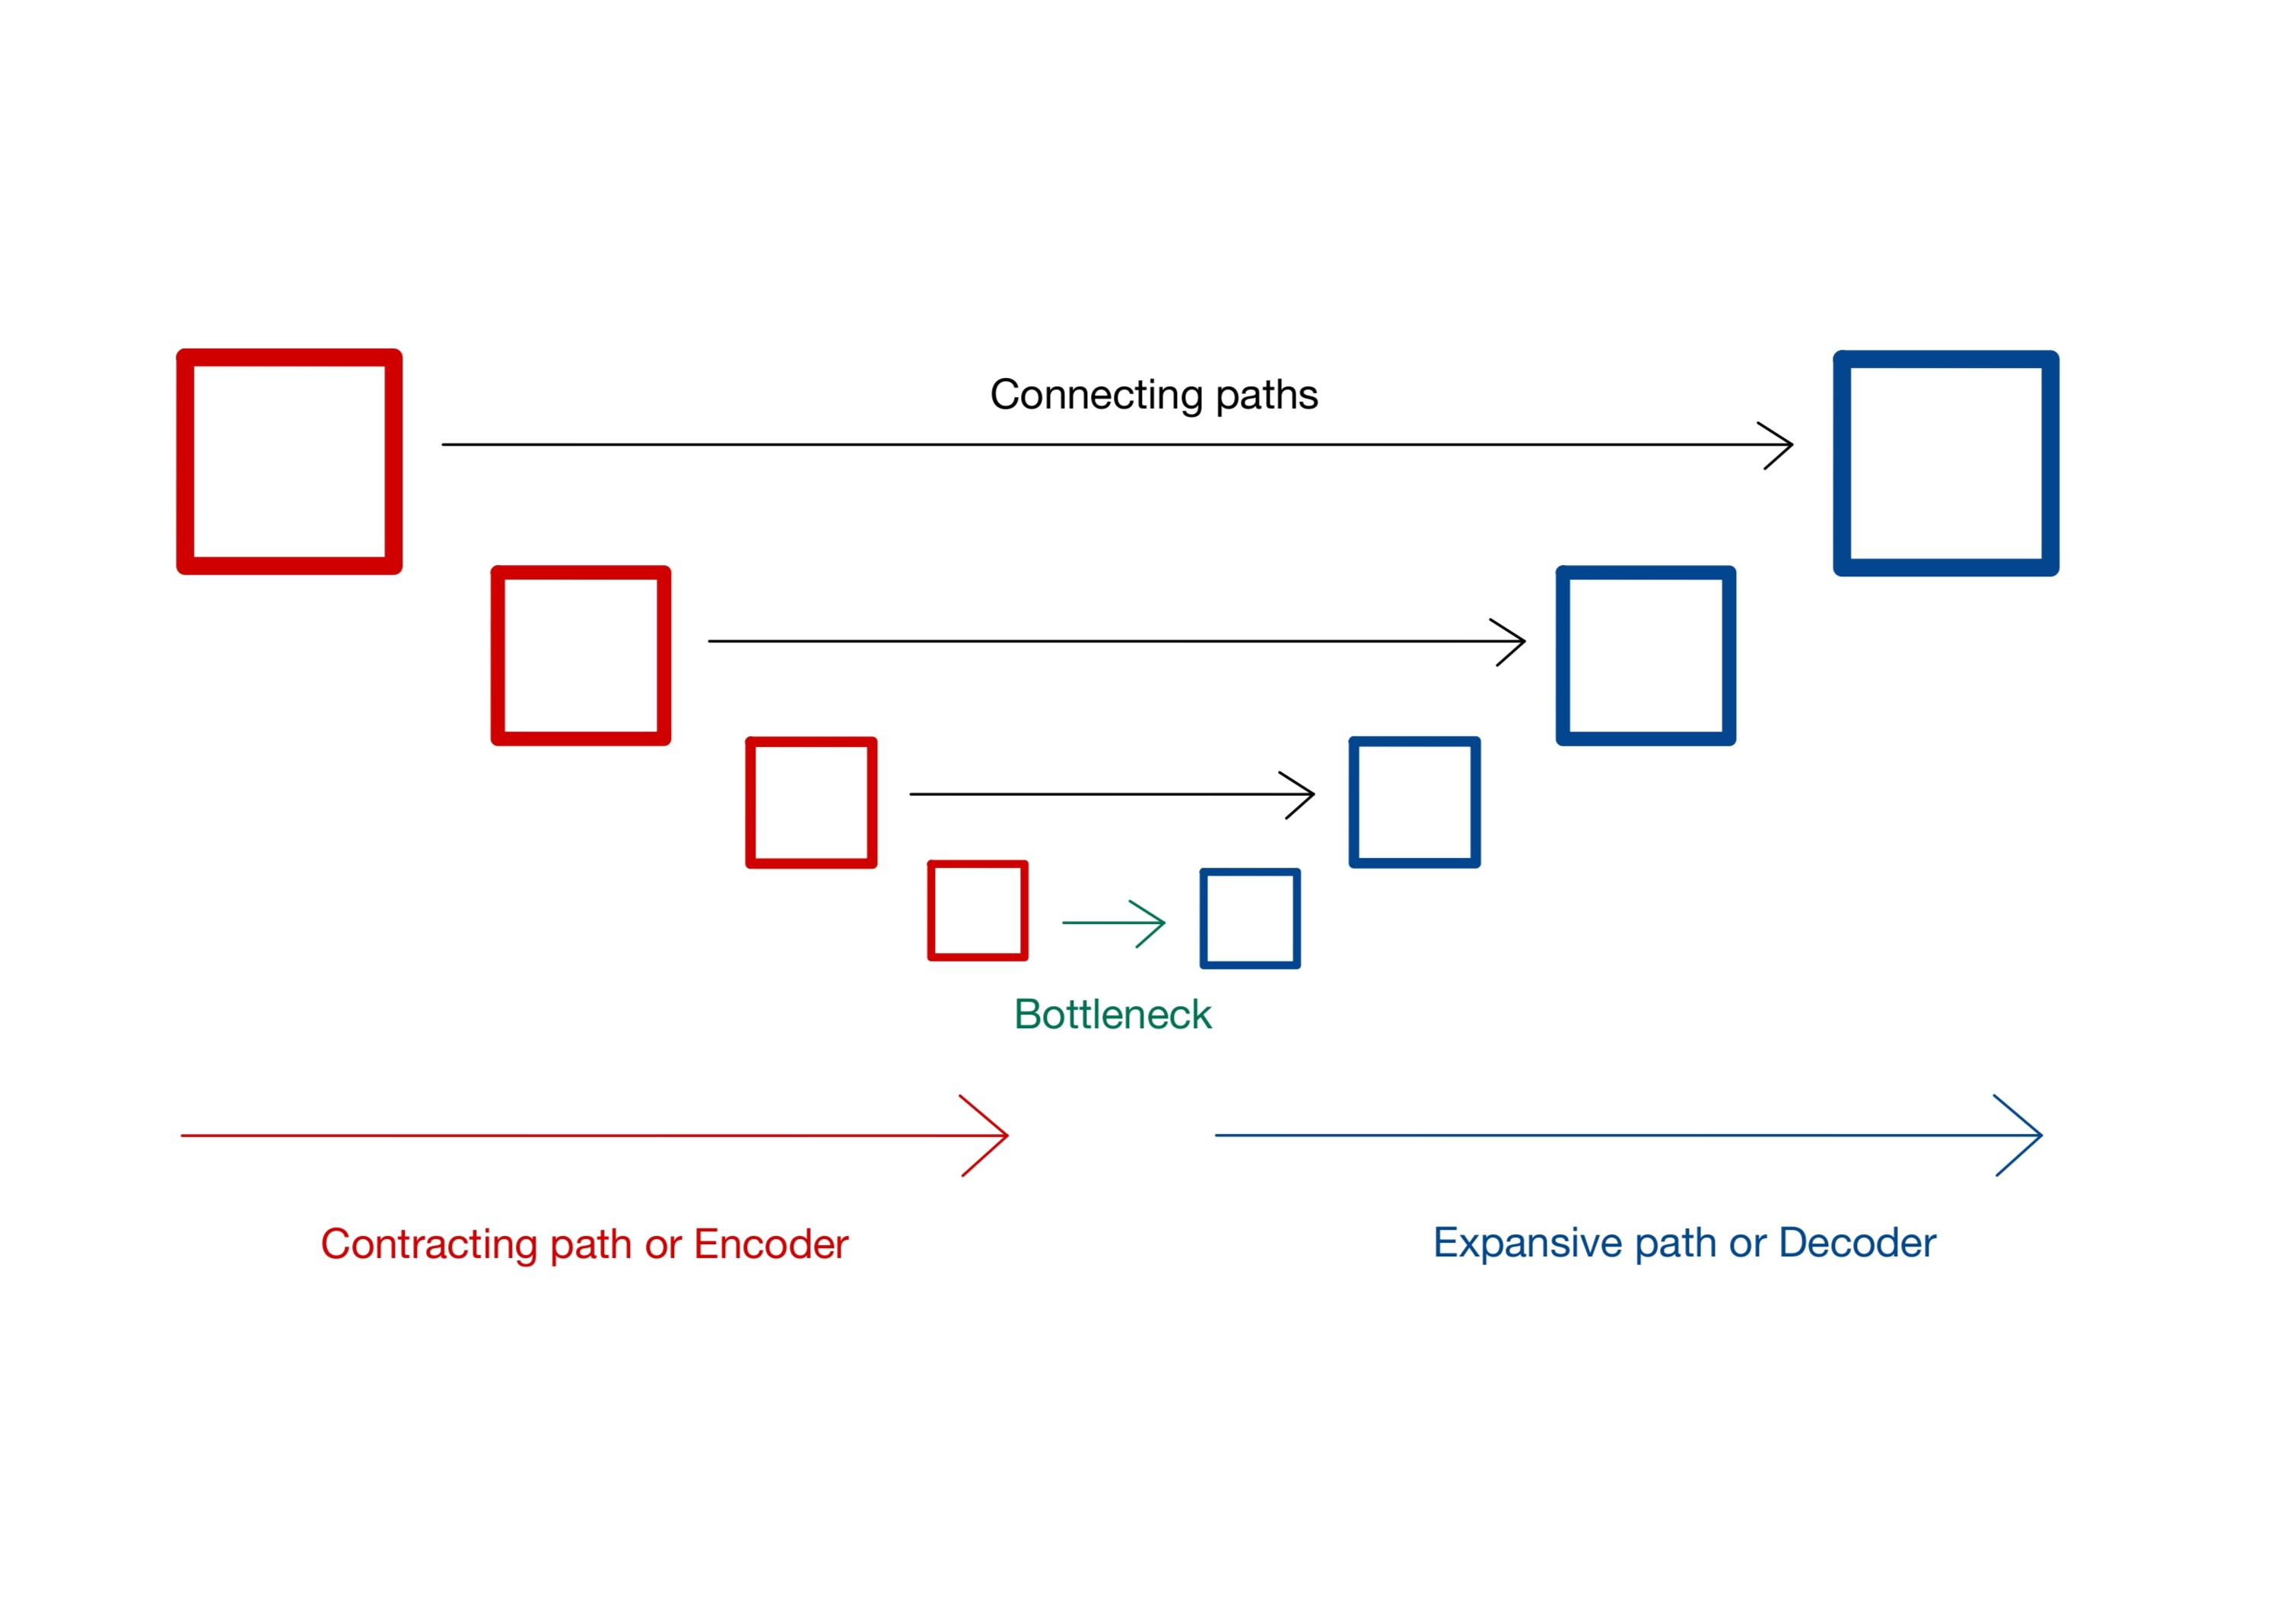
</div>

### Theory and Mechanics of Diffusion Models


Diffusion models are generative models that generate new data based on the data they are trained on. There are different types of diffusion models such as Denoising Diffusion Probabilistic Models (DDPMs), Score Based Generative Models (SGMs), or Stochastic Differential Equations (Score SDEs).

The initial paper on Diffusion Models is “Deep Unsupervised Learning using Nonequilibrium Thermodynamics” written by Sohl-Dickstein et al. in 2015. As described by Ho et al. (2020), a diffusion model is a parametrized Markov chain trained using variational inference to produce samples matching the data after finite time. The main idea of diffusion models is to add noise little by little to the data until it reaches a well-behaved distribution such as a Gaussian distribution for example, and then to use a neural network to learn the reverse process. The first part of adding noise is called forward diffusion process (q), the second phase is the backward diffusion process (p).

First, let us dive into the forward diffusion process. I will used the same notations as in the initial by paper by Sohl-Dickstein et al. (2015). The objective is to transform the data distribution $ q(x^{(0)}) $ into a well-behaved distribution $ \pi(y)$ by repeatedly applying a Markov diffusion kernel $T_\pi (y|y'; \beta)$ for $\pi(y)$ where $\beta $ is the diffusion rate. So, because we are in a Markov process, $x^{(t)}$ depends only on the previous time-step $x^{(t-1)}$. 

The forward trajectory, corresponding to starting at the data distribution and performing T steps of diffusion, is thus:

$$ q(x^{(0...T)}) = q(x^{(0)}) 	\prod\limits_{t=1}^T q(x^{(t)} | x^{(t-1)}) $$  

We need to be careful when choosing the value of the diffusion rate $\beta $, we can predefine it by giving it some value, or we can learn it with gradient descent. It is important to choose an adequate $\beta $ because it will influence the distribution we find at the end, and we want this distribution to be well-behaved. Let us remark that in general, all papers on diffusion models use the Gaussian distribution as the well-behaved distribution $\pi(y)$.

Now, let us have a look at the backward diffusion process. Here, we start from the well-behaved distribution $p(x^{(T)}) (= \pi(x^{(T)}))$ and we try to reach the original data. Thus, the equation of the backward diffusion process of the previous forward trajectory is:

$$ p(x^{(0...T)}) = p(x^{(T)}) 	\prod\limits_{t=1}^T p(x^{(t-1)} | x^{(t)}) $$

This is also a Markov process and, because we are doing the reverse trajectory, $x^{(t-1)}$ depends only on the previous time-step $x^{(t)}$.

However, the distribution p is unknown. We can assume that it is a Gaussian distribution, but we do not know its mean and covariance. Thus, we will need to estimate them during the training process using gradient descent.

Here is an illustration that I adapted of how diffusion models work from the paper by Ho et al. (2020):

<div>
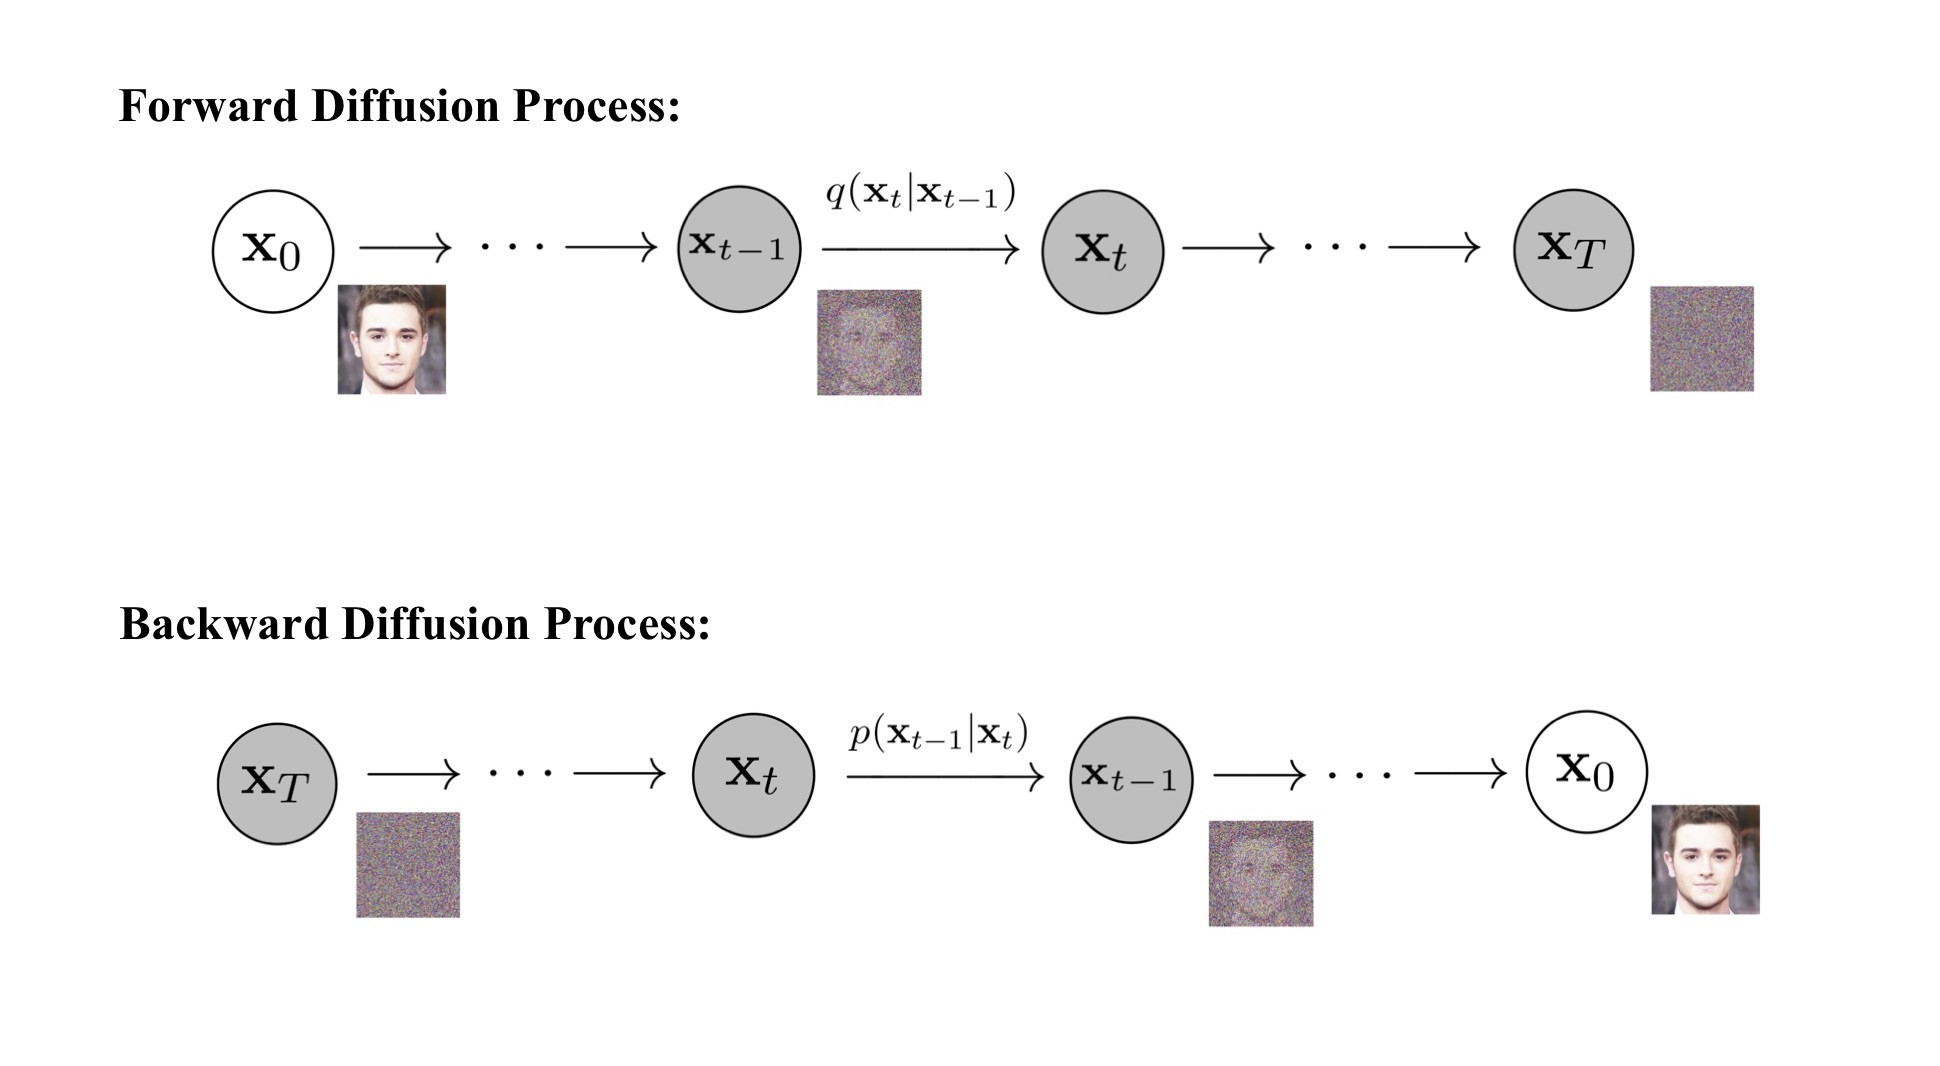
</div>

## 2. Dataset Preparation

*Utilize the CelebA dataset, ensuring appropriate preprocessing for diffusion models.*

**What is CelebA?**

The CelebFaces Attributes Dataset, or CelebA, is a large-scale face attributes dataset with  202,599 face images relating to over 10,000 celebrities. 

CelebA has large diversities, large quantities, and rich annotations, including:
- 10,177 number of identities,
- 202,599 number of face images, and
- 5 landmark locations, 40 binary attributes annotations per image.

First, let's import some packages used for loading  and preprocessiong the data set.

In [2]:
import os
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import Subset

In [3]:
current_path = os.getcwd()
IMAGE_PATH = current_path + '\\CelebA\\'
SAMPLE_PATH = current_path

if not os.path.exists(SAMPLE_PATH):
    os.makedirs(SAMPLE_PATH)

I am also going to transform the images by normalizing the pixel values.

First, I create a series of transformation functions to apply to the images in the dataset. So, the *transforms.Resize(64)* resizes each image to 128x128 pixels. The *transforms.ToTensor()* converts the image from a PIL Image format to a PyTorch tensor.
And the *transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))* normalizes the image tensor by setting its mean and standard deviation to 0.5 for all three color channels (RGB).

Images must be normalized in the range $[-1, 1]$, as our network will have to predict noise values that are normally distributed

I then apply this transformation to all images in the dataset.

Finally, *DataLoader()* creates a data loader, which allows the model to load data in batches during training. This particular data loader loads data in batches of 16, shuffles the data at every epoch, and drops the last incomplete batch if the dataset size is not divisible by the batch size.

In [4]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageFolder(IMAGE_PATH, transform)

train_subset = Subset(dataset, range(1000))
data_loader = DataLoader(dataset=train_subset, batch_size=16, shuffle=True, drop_last=True)

In [5]:
len(data_loader)

62

Let's have a look at ten images.

In [6]:
import PIL

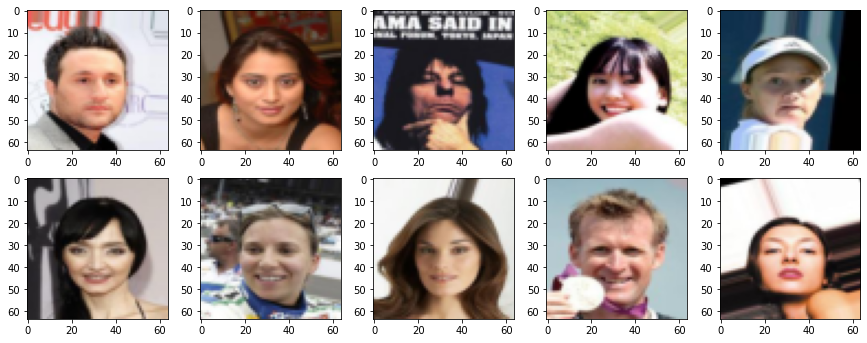

In [7]:
images, _ = next(iter(data_loader))
images = images[:10]

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i in range(10):
    img = (images[i] + 1) * 127.5
    img = img.permute(1, 2, 0).type(torch.uint8)
    axs[i // 5, i % 5].imshow(img)
    
if len(images) < 5*5:
    for i in range(len(images), 5*5):
        fig.delaxes(axs.flatten()[i])
    
plt.show()

## 3. Implementing Diffusion Models

*Implement a diffusion model suitable for generating images from the CelebA dataset. Focus on integrating U-Net as a component of the diffusion model.*

*Utilize tutorials and resources such as Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239 and the Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modelin*

First, let us define the U-Net architecture.

I am going to define a U-Net architecture with the following structure:

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from tqdm import tqdm
import torch.nn.functional as F

First, let's define the U-Net architecture

In [9]:
class UNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super(UNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=padding)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout(x)
        x = self.conv2(x)
        return x

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(UNet, self).__init__()
        self.conv1 = UNetBlock(in_channels, 16)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = UNetBlock(16, 32)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = UNetBlock(32, 64)
        self.pool3 = nn.MaxPool2d(2)

        self.upconv4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0)
        self.conv4 = UNetBlock(64, 32)

        self.upconv5 = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, padding=0)
        self.conv5 = UNetBlock(32, 16)

        self.output_layer = nn.Conv2d(16, out_channels, kernel_size=1)

    def forward(self, x):
        conv1 = self.conv1(x)
        pool1 = self.pool1(conv1)

        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)

        conv3 = self.conv3(pool2)
        pool3 = self.pool3(conv3)

        upconv4 = self.upconv4(pool3)
        crop4 = self.center_crop(conv2, upconv4.size()[2:])
        concat4 = torch.cat([upconv4, crop4], dim=1)
        conv4 = self.conv4(concat4)

        upconv5 = self.upconv5(conv4)
        crop5 = self.center_crop(conv1, upconv5.size()[2:])
        concat5 = torch.cat([upconv5, crop5], dim=1)
        conv5 = self.conv5(concat5)

        output = self.output_layer(conv5)
        return output

    def center_crop(self, layer, target_size):
        _, _, layer_height, layer_width = layer.size()
        diff_y = (layer_height - target_size[0]) // 2
        diff_x = (layer_width - target_size[1]) // 2
        return layer[:, :, diff_y:(diff_y + target_size[0]), diff_x:(diff_x + target_size[1])]

Now, let's define the diffusion model

In [10]:
class DiffusionStep(nn.Module):
    def __init__(self):
        super(DiffusionStep, self).__init__()

    def forward(self, x):
        # Implement your diffusion step logic here
        noise = torch.randn_like(x) * 0.1
        diffused_x = x + noise
        return diffused_x

class DiffusionModel(nn.Module):
    def __init__(self, diffusion_step, unet_model, num_steps=10):
        super(DiffusionModel, self).__init__()
        self.diffusion_steps = nn.ModuleList([diffusion_step() for _ in range(num_steps)])
        self.unet_model = unet_model

    def forward(self, x):
        for diffusion_step in self.diffusion_steps:
            x = diffusion_step(x)
        x = self.unet_model(x)
        return x

Initialize U-Net and diffusion model

In [11]:
my_unet = UNet()
my_diffusion_model = DiffusionModel(DiffusionStep, my_unet)

Let's train the model

In [41]:
# Hyperparameters
batch_size = 16
learning_rate = 0.001
num_epochs = 10

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(my_diffusion_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for images, _ in tqdm(data_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        optimizer.zero_grad()

        # Perform forward pass through the diffusion model
        outputs = my_diffusion_model(images)

        # Resize the target images to match the size of the U-Net output
        images_resized = F.interpolate(images, size=(outputs.size(2), outputs.size(3)), mode='bilinear', align_corners=False)

        # Compute the loss
        loss = criterion(outputs, images_resized)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

    # Print the loss after each epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')
    
# Save the trained model if needed
torch.save(my_diffusion_model.state_dict(), 'diffusion_model.pth')

Epoch 1/10:  23%|███████████████▊                                                      | 14/62 [00:04<00:14,  3.35it/s]


KeyboardInterrupt: 

## 4. Generating Images with Diffusion Models

*Apply the implemented diffusion model to generate images from the CelebA dataset. Evaluate the quality and fidelity of the generated images.*

In [40]:
import torch
from torchvision.utils import save_image
from tqdm import tqdm

# Load the pre-trained U-Net and diffusion model
unet = UNet()
diffusion_model = DiffusionModel(DiffusionStep, unet, num_steps=10)
diffusion_model.load_state_dict(torch.load('diffusion_model.pth'))
diffusion_model.eval()

# Set the device (CPU or GPU) based on availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
diffusion_model.to(device)

num_samples = 10

with torch.no_grad():
    for i in tqdm(range(num_samples), desc='Generating Images'):
        generated_image = torch.randn(1, 3, 256, 256).to(device)  # Adjust the size based on your U-Net input size
        generated_image = diffusion_model(generated_image)

        # Denormalize the generated image
        generated_image = (generated_image + 1) / 2  # Assuming the original range was [-1, 1]

        save_image(generated_image.squeeze(), f'generated_image_{i + 1}.png', normalize=True)

Generating Images:   0%|                                                                        | 0/10 [00:00<?, ?it/s]


TypeError: forward() missing 1 required positional argument: 't'

Let's have a look at the generated images:

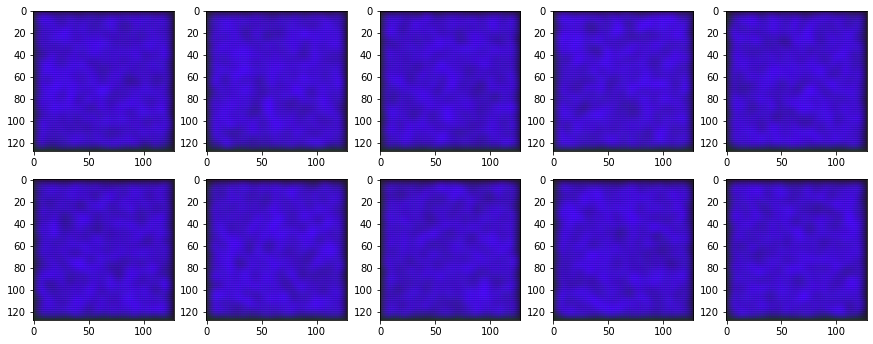

In [25]:
import glob
import matplotlib.pyplot as plt

sample_images = sorted(glob.glob('*.png'))

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, image_path in enumerate(sample_images):
    img = PIL.Image.open(image_path)
    axs[i // 5, i % 5].imshow(img)

if len(sample_images) < 5*5:
    for i in range(len(sample_images), 5*5):
        fig.delaxes(axs.flatten()[i])

plt.show()


## Step 1: The forward process = Noise scheduler

In [7]:
import torch.nn.functional as F

def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return torch.linspace(start, end, timesteps)

def get_index_from_list(vals, t, x_shape):
    """ 
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    batch_size = t.shape[0]
    out = vals.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

def forward_diffusion_sample(x_0, t, device="cpu"):
    """ 
    Takes an image and a timestep as input and 
    returns the noisy version of it
    """
    noise = torch.randn_like(x_0)
    sqrt_alphas_cumprod_t = get_index_from_list(sqrt_alphas_cumprod, t, x_0.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x_0.shape
    )
    # mean + variance
    return sqrt_alphas_cumprod_t.to(device) * x_0.to(device) \
    + sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device), noise.to(device)


# Define beta schedule
T = 300
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

In [8]:
def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :] 
    plt.imshow(reverse_transforms(image))

In [9]:
import numpy as np

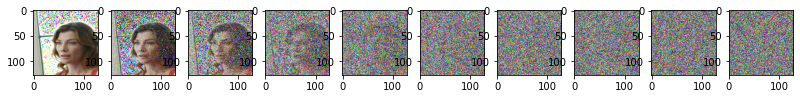

In [15]:
# Simulate forward diffusion
image = next(iter(data_loader))[0]

plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(T/num_images)

for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(image, t)
    show_tensor_image(img)

## Step 2: The backward process = U-Net

In [16]:
from torch import nn
import math


class Block(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp =  nn.Linear(time_emb_dim, out_ch)
        if up:
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()
        
    def forward(self, x, t, ):
        # First Conv
        h = self.bnorm1(self.relu(self.conv1(x)))
        # Time embedding
        time_emb = self.relu(self.time_mlp(t))
        # Extend last 2 dimensions
        time_emb = time_emb[(..., ) + (None, ) * 2]
        # Add time channel
        h = h + time_emb
        # Second Conv
        h = self.bnorm2(self.relu(self.conv2(h)))
        # Down or Upsample
        return self.transform(h)


class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # TODO: Double check the ordering here
        return embeddings


class SimpleUnet(nn.Module):
    """
    A simplified variant of the Unet architecture.
    """
    def __init__(self):
        super().__init__()
        image_channels = 3
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 3 
        time_emb_dim = 32

        # Time embedding
        self.time_mlp = nn.Sequential(
                SinusoidalPositionEmbeddings(time_emb_dim),
                nn.Linear(time_emb_dim, time_emb_dim),
                nn.ReLU()
            )
        
        # Initial projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample
        self.downs = nn.ModuleList([Block(down_channels[i], down_channels[i+1], \
                                    time_emb_dim) \
                    for i in range(len(down_channels)-1)])
        # Upsample
        self.ups = nn.ModuleList([Block(up_channels[i], up_channels[i+1], \
                                        time_emb_dim, up=True) \
                    for i in range(len(up_channels)-1)])
        
        # Edit: Corrected a bug found by Jakub C (see YouTube comment)
        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embedd time
        t = self.time_mlp(timestep)
        # Initial conv
        x = self.conv0(x)
        # Unet
        residual_inputs = []
        for down in self.downs:
            x = down(x, t)
            residual_inputs.append(x)
        for up in self.ups:
            residual_x = residual_inputs.pop()
            # Add residual x as additional channels
            x = torch.cat((x, residual_x), dim=1)           
            x = up(x, t)
        return self.output(x)

model = SimpleUnet()
print("Num params: ", sum(p.numel() for p in model.parameters()))
model

Num params:  62438883


SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

## Step 3: The loss

In [17]:
def get_loss(model, x_0, t):
    x_noisy, noise = forward_diffusion_sample(x_0, t, device)
    noise_pred = model(x_noisy, t)
    return F.l1_loss(noise, noise_pred)

## Sampling

In [18]:
@torch.no_grad()
def sample_timestep(x, t):
    """
    Calls the model to predict the noise in the image and returns 
    the denoised image. 
    Applies noise to this image, if we are not in the last step yet.
    """
    betas_t = get_index_from_list(betas, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x.shape
    )
    sqrt_recip_alphas_t = get_index_from_list(sqrt_recip_alphas, t, x.shape)
    
    # Call model (current image - noise prediction)
    model_mean = sqrt_recip_alphas_t * (
        x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t
    )
    posterior_variance_t = get_index_from_list(posterior_variance, t, x.shape)
    
    if t == 0:
        # As pointed out by Luis Pereira (see YouTube comment)
        # The t's are offset from the t's in the paper
        return model_mean
    else:
        noise = torch.randn_like(x)
        return model_mean + torch.sqrt(posterior_variance_t) * noise 

@torch.no_grad()
def sample_plot_image():
    # Sample noise
    img_size = IMG_SIZE
    img = torch.randn((1, 3, img_size, img_size), device=device)
    plt.figure(figsize=(15,15))
    plt.axis('off')
    num_images = 10
    stepsize = int(T/num_images)

    for i in range(0,T)[::-1]:
        t = torch.full((1,), i, device=device, dtype=torch.long)
        img = sample_timestep(img, t)
        # Edit: This is to maintain the natural range of the distribution
        img = torch.clamp(img, -1.0, 1.0)
        if i % stepsize == 0:
            plt.subplot(1, num_images, int(i/stepsize)+1)
            show_tensor_image(img.detach().cpu())
    plt.show()      

## Training

In [ ]:
from torch.optim import Adam

IMG_SIZE = 64
BATCH_SIZE = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 10 # Try more!

for epoch in range(epochs):
    for step, batch in enumerate(data_loader):
        optimizer.zero_grad()

        t = torch.randint(0, T, (BATCH_SIZE,), device=device).long()
        loss = get_loss(model, batch[0], t)
        loss.backward()
        optimizer.step()

    if epoch % 5 == 0 and step == 0:
        print(f"Epoch {epoch} | step {step:03d} Loss: {loss.item()} ")
        sample_plot_image()

## 3. Implementing Diffusion Models

*Implement a diffusion model suitable for generating images from the CelebA dataset. Focus on integrating U-Net as a component of the diffusion model.*

*Utilize tutorials and resources such as Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239 and the Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modelin*

First, let us define the U-Net architecture.

I am going to define a U-Net architecture with the following structure:

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from tqdm import tqdm
import torch.nn.functional as F

First, let's define the U-Net architecture

In [28]:
class UNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super(UNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=padding)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout(x)
        x = self.conv2(x)
        return x

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(UNet, self).__init__()
        self.conv1 = UNetBlock(in_channels, 16)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = UNetBlock(16, 32)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = UNetBlock(32, 64)
        self.pool3 = nn.MaxPool2d(2)

        self.upconv4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0)
        self.conv4 = UNetBlock(64, 32)

        self.upconv5 = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, padding=0)
        self.conv5 = UNetBlock(32, 16)

        self.output_layer = nn.Conv2d(16, out_channels, kernel_size=1)
        self.upsample = nn.Upsample((64, 64), mode='bilinear', align_corners=False)

    def forward(self, x, t):
        conv1 = self.conv1(x)
        pool1 = self.pool1(conv1)

        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)

        conv3 = self.conv3(pool2)
        pool3 = self.pool3(conv3)

        upconv4 = self.upconv4(pool3)
        crop4 = self.center_crop(conv2, upconv4.size()[2:])
        concat4 = torch.cat([upconv4, crop4], dim=1)
        conv4 = self.conv4(concat4)

        upconv5 = self.upconv5(conv4)
        crop5 = self.center_crop(conv1, upconv5.size()[2:])
        concat5 = torch.cat([upconv5, crop5], dim=1)
        conv5 = self.conv5(concat5)

        output = self.output_layer(conv5)
        output = self.upsample(output)
        return output

    def center_crop(self, layer, target_size):
        _, _, layer_height, layer_width = layer.size()
        diff_y = (layer_height - target_size[0]) // 2
        diff_x = (layer_width - target_size[1]) // 2
        return layer[:, :, diff_y:(diff_y + target_size[0]), diff_x:(diff_x + target_size[1])]


Now, let's define the diffusion model

In [29]:
class MyDDPM(nn.Module):
    def __init__(self, network, n_steps=200, min_beta=10 ** -4, max_beta=0.02, device=None, image_chw=(1, 28, 28)):
        super(MyDDPM, self).__init__()
        self.n_steps = n_steps
        self.device = device
        self.image_chw = image_chw
        self.network = network.to(device)  # Remove the parentheses here
        self.betas = torch.linspace(min_beta, max_beta, n_steps).to(device)
        self.alphas = 1 - self.betas
        self.alpha_bars = torch.tensor([torch.prod(self.alphas[:i + 1]) for i in range(len(self.alphas))]).to(device)

    def forward(self, x0, t, eta=None):
        # Make input image more noisy (we can directly skip to the desired step)
        n, c, h, w = x0.shape
        a_bar = self.alpha_bars[t]

        if eta is None:
            eta = torch.randn(n, c, h, w).to(self.device)

        noisy = a_bar.sqrt().reshape(n, 1, 1, 1) * x0 + (1 - a_bar).sqrt().reshape(n, 1, 1, 1) * eta
        return noisy

    def backward(self, x, t):
        # Run each image through the network for each timestep t in the vector t.
        # The network returns its estimation of the noise that was added.
        return self.network(x, t)

In [30]:
def show_forward(ddpm, loader, device):
    # Showing the forward process
    for batch in loader:
        imgs = batch[0]

        show_images(imgs, "Original images")

        for percent in [0.25, 0.5, 0.75, 1]:
            show_images(
                ddpm(imgs.to(device),
                     [int(percent * ddpm.n_steps) - 1 for _ in range(len(imgs))]),
                f"DDPM Noisy images {int(percent * 100)}%"
            )
        break

In [31]:
def generate_new_images(ddpm, n_samples=16, device=None, frames_per_gif=10, gif_name="sampling.gif", c=3, h=128, w=128):
    """Given a DDPM model, a number of samples to be generated and a device, returns some newly generated samples"""
    frame_idxs = np.linspace(0, ddpm.n_steps, frames_per_gif).astype(np.uint)
    frames = []

    with torch.no_grad():
        if device is None:
            device = ddpm.device

        # Starting from random noise
        x = torch.randn(n_samples, c, h, w).to(device)

        for idx, t in enumerate(list(range(ddpm.n_steps))[::-1]):
            # Estimating noise to be removed
            time_tensor = (torch.ones(n_samples, 1) * t).to(device).long()
            eta_theta = ddpm.backward(x, time_tensor)
            print(eta_theta.shape)

            alpha_t = ddpm.alphas[t]
            alpha_t_bar = ddpm.alpha_bars[t]

            # Partially denoising the image
            x = (1 / alpha_t.sqrt()) * (x - (1 - alpha_t) / (1 - alpha_t_bar).sqrt() * eta_theta)

            if t > 0:
                z = torch.randn(n_samples, c, h, w).to(device)

                # Option 1: sigma_t squared = beta_t
                beta_t = ddpm.betas[t]
                sigma_t = beta_t.sqrt()

                # Option 2: sigma_t squared = beta_tilda_t
                # prev_alpha_t_bar = ddpm.alpha_bars[t-1] if t > 0 else ddpm.alphas[0]
                # beta_tilda_t = ((1 - prev_alpha_t_bar)/(1 - alpha_t_bar)) * beta_t
                # sigma_t = beta_tilda_t.sqrt()

                # Adding some more noise like in Langevin Dynamics fashion
                x = x + sigma_t * z

            # Adding frames to the GIF
            if idx in frame_idxs or t == 0:
                # Putting digits in range [0, 255]
                normalized = x.clone()
                for i in range(len(normalized)):
                    normalized[i] -= torch.min(normalized[i])
                    normalized[i] *= 255 / torch.max(normalized[i])

                # Reshaping batch (n, c, h, w) to be a (as much as it gets) square frame
                frame = einops.rearrange(normalized, "(b1 b2) c h w -> (b1 h) (b2 w) c", b1=int(n_samples ** 0.5))
                frame = frame.cpu().numpy().astype(np.uint8)

                # Rendering frame
                frames.append(frame)

    # Storing the gif
    with imageio.get_writer(gif_name, mode="I") as writer:
        for idx, frame in enumerate(frames):
            writer.append_data(frame)
            if idx == len(frames) - 1:
                for _ in range(frames_per_gif // 3):
                    writer.append_data(frames[-1])
    return x

Initialize U-Net and diffusion model

In [32]:
# Defining model
n_steps, min_beta, max_beta = 1000, 10 ** -4, 0.02  # Originally used by the authors
ddpm = MyDDPM(UNet(in_channels=3, out_channels=3), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device='cpu')


In [26]:
eta.shape

NameError: name 'eta' is not defined

In [33]:
def show_images(images, title=""):
    """Shows the provided images as sub-pictures in a square"""

    # Converting images to CPU numpy arrays
    if type(images) is torch.Tensor:
        images = images.detach().cpu().numpy()

    # Defining number of rows and columns
    fig = plt.figure(figsize=(8, 8))
    rows = int(len(images) ** (1 / 2))
    cols = round(len(images) / rows)

    # Populating figure with sub-plots
    idx = 0
    for r in range(rows):
        for c in range(cols):
            fig.add_subplot(rows, cols, idx + 1)

            if idx < len(images):
                plt.imshow(images[idx][0])
                idx += 1
    fig.suptitle(title, fontsize=30)

    # Showing the figure
    plt.show()

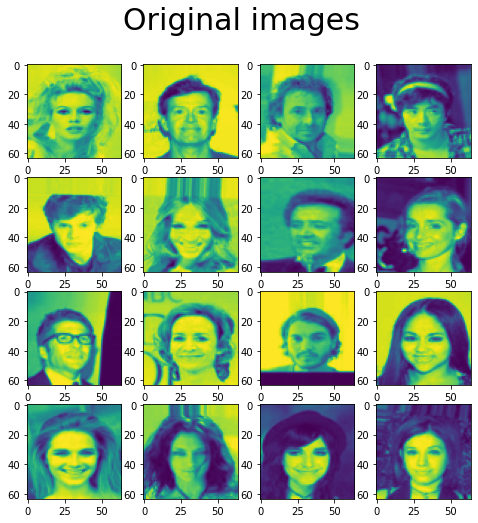

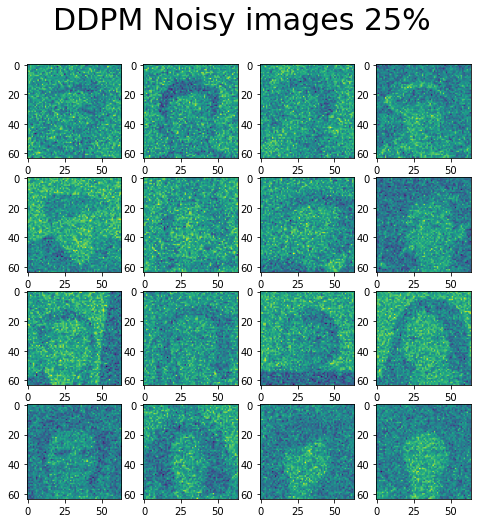

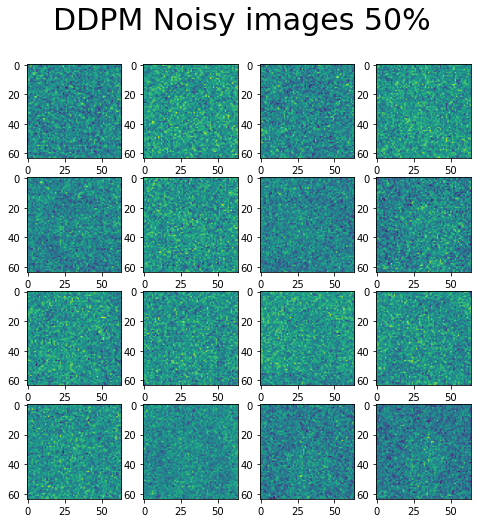

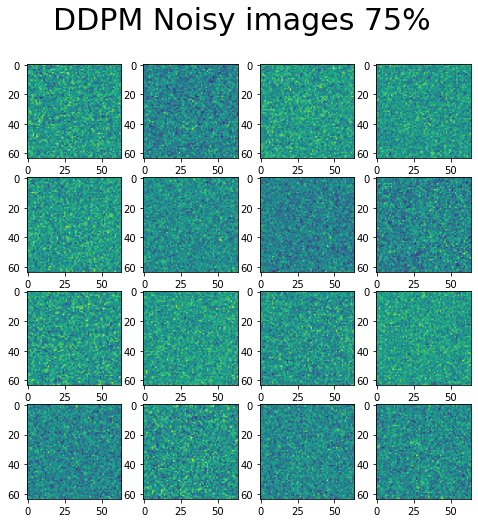

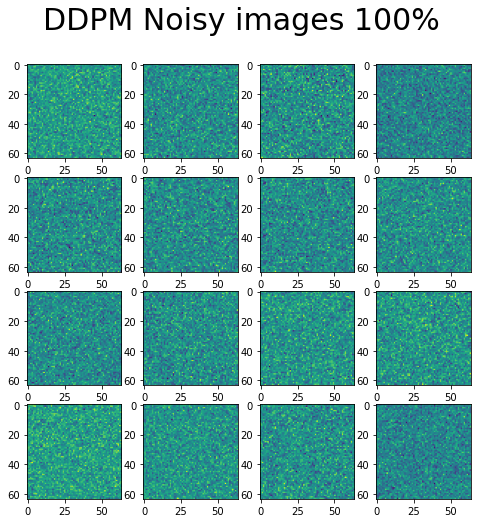

In [34]:
# Optionally, show the diffusion (forward) process
show_forward(ddpm, data_loader, device='cpu')

Let's train the model

In [35]:
import torch.nn.functional as F

def training_loop(ddpm, loader, n_epochs, optimizer, device, display=False, store_path="ddpm_model.pt"):
    mse = nn.MSELoss()
    best_loss = float("inf")
    n_steps = ddpm.n_steps

    for epoch in tqdm(range(n_epochs), desc=f"Training progress", colour="#00ff00"):
        epoch_loss = 0.0
        for step, batch in enumerate(tqdm(loader, leave=False, desc=f"Epoch {epoch + 1}/{n_epochs}", colour="#005500")):
            # Loading data
            x0 = batch[0].to(device)
            n = len(x0)

            # Picking some noise for each of the images in the batch, a timestep and the respective alpha_bars
            eta = torch.randn_like(x0).to(device)
            print(eta.shape)
            t = torch.randint(0, n_steps, (n,)).to(device)

            # Computing the noisy image based on x0 and the time-step (forward process)
            noisy_imgs = ddpm(x0, t, eta)
            print(noisy_imgs.shape)

            # Getting model estimation of noise based on the images and the time-step
            eta_theta = ddpm.backward(noisy_imgs, t.reshape(n, -1))

            # Resize eta_theta to match the size of eta
            eta_theta_resized = F.interpolate(eta_theta, size=eta.shape[2:], mode='bilinear', align_corners=False)

            # Optimizing the MSE between the noise plugged and the predicted noise
            loss = mse(eta_theta_resized, eta)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * len(x0) / len(loader.dataset)

        # Display images generated at this epoch
        if display:
            show_images(generate_new_images(ddpm, device=device), f"Images generated at epoch {epoch + 1}")

        log_string = f"Loss at epoch {epoch + 1}: {epoch_loss:.3f}"

        # Storing the model
        if best_loss > epoch_loss:
            best_loss = epoch_loss
            torch.save(ddpm.state_dict(), store_path)
            log_string += " --> Best model ever (stored)"

        print(log_string)


In [36]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
n_epochs = 10

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(ddpm.parameters(), lr=learning_rate)

training_loop(ddpm, data_loader, n_epochs, optimizer, device='cpu', display=False, store_path="ddpm_model.pt")

Epoch 1/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:   2%|█▏                                                                     | 1/62 [00:00<00:15,  3.96it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:   5%|███▍                                                                   | 3/62 [00:00<00:14,  4.01it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:   6%|████▌                                                                  | 4/62 [00:00<00:14,  3.99it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  10%|██████▊                                                                | 6/62 [00:01<00:13,  4.02it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  13%|█████████▏                                                             | 8/62 [00:01<00:13,  4.01it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  18%|████████████▍                                                         | 11/62 [00:02<00:12,  4.03it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:12,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:12,  4.00it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.01it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  26%|██████████████████                                                    | 16/62 [00:03<00:11,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:10,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  29%|████████████████████▎                                                 | 18/62 [00:04<00:09,  4.53it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:09,  4.47it/s]


torch.Size([16, 3, 64, 64])



Epoch 1/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:09,  4.55it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  34%|███████████████████████▋                                              | 21/62 [00:05<00:09,  4.48it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:08,  4.47it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.33it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:08,  4.44it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  40%|████████████████████████████▏                                         | 25/62 [00:05<00:08,  4.33it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  47%|████████████████████████████████▋                                     | 29/62 [00:06<00:08,  4.04it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.04it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:07,  4.01it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:07,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  60%|█████████████████████████████████████████▊                            | 37/62 [00:08<00:05,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.46it/s]

torch.Size([16, 3, 64, 64])



Epoch 1/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.34it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:04,  4.35it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:10<00:04,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.40it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  71%|█████████████████████████████████████████████████▋                    | 44/62 [00:10<00:04,  4.31it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:03,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:10<00:03,  4.19it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:03,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:12<00:01,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 1/10:  90%|███████████████████████████████████████████████████████████████▏      | 56/62 [00:13<00:01,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 1/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Loss at epoch 1: 0.993 --> Best model ever (stored)
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:   3%|██▎                                                                    | 2/62 [00:00<00:14,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:   5%|███▍                                                                   | 3/62 [00:00<00:14,  4.13it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:   8%|█████▋                                                                 | 5/62 [00:01<00:13,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  10%|██████▊                                                                | 6/62 [00:01<00:13,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  11%|████████                                                               | 7/62 [00:01<00:13,  4.21it/s]

torch.Size([16, 3, 64, 64])



Epoch 2/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  18%|████████████▍                                                         | 11/62 [00:02<00:12,  4.12it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:11,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:10,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  29%|████████████████████▎                                                 | 18/62 [00:04<00:10,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:10,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  34%|███████████████████████▋                                              | 21/62 [00:05<00:10,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:09,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  40%|████████████████████████████▏                                         | 25/62 [00:06<00:08,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  47%|████████████████████████████████▋                                     | 29/62 [00:07<00:08,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:06,  4.30it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:06,  4.35it/s]

torch.Size([16, 3, 64, 64])



Epoch 2/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:05,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:10<00:04,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:04,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:11<00:03,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:03,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  81%|████████████████████████████████████████████████████████▍             | 50/62 [00:12<00:02,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.11it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:13<00:01,  4.03it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:14<00:00,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 2/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.21it/s]


torch.Size([16, 3, 64, 64])



Epoch 2/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 2/10: 100%|██████████████████████████████████████████████████████████████████████| 62/62 [00:15<00:00,  4.09it/s]
                                                                                                                       

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
Loss at epoch 2: 0.989 --> Best model ever (stored)

Epoch 3/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:   2%|█▏                                                                     | 1/62 [00:00<00:14,  4.35it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 3/10:   5%|███▍                                                                   | 3/62 [00:00<00:14,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 3/10:   8%|█████▋                                                                 | 5/62 [00:01<00:14,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  10%|██████▊                                                                | 6/62 [00:01<00:13,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  11%|████████                                                               | 7/62 [00:01<00:12,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 3/10:  18%|████████████▍                                                         | 11/62 [00:02<00:12,  4.11it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 3/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:11,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 3/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  26%|██████████████████                                                    | 16/62 [00:03<00:11,  4.03it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:11,  4.03it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  29%|████████████████████▎                                                 | 18/62 [00:04<00:10,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:10,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  34%|███████████████████████▋                                              | 21/62 [00:05<00:10,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:09,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  40%|████████████████████████████▏                                         | 25/62 [00:06<00:08,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  47%|████████████████████████████████▋                                     | 29/62 [00:07<00:07,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 3/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:07,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:06,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:05,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:10<00:04,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  71%|█████████████████████████████████████████████████▋                    | 44/62 [00:10<00:04,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:04,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:11<00:03,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:03,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  81%|████████████████████████████████████████████████████████▍             | 50/62 [00:12<00:02,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:13<00:01,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  90%|███████████████████████████████████████████████████████████████▏      | 56/62 [00:13<00:01,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:14<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 3/10: 100%|██████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Loss at epoch 3: 0.981 --> Best model ever (stored)
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:   2%|█▏                                                                     | 1/62 [00:00<00:13,  4.47it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 4/10:   5%|███▍                                                                   | 3/62 [00:00<00:13,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:   6%|████▌                                                                  | 4/62 [00:00<00:13,  4.45it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:   8%|█████▋                                                                 | 5/62 [00:01<00:13,  4.33it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  10%|██████▊                                                                | 6/62 [00:01<00:12,  4.41it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  11%|████████                                                               | 7/62 [00:01<00:12,  4.43it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.50it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 4/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.35it/s]


torch.Size([16, 3, 64, 64])



Epoch 4/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  18%|████████████▍                                                         | 11/62 [00:02<00:11,  4.31it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:11,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:11,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  26%|██████████████████                                                    | 16/62 [00:03<00:11,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  27%|███████████████████▏                                                  | 17/62 [00:03<00:10,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  29%|████████████████████▎                                                 | 18/62 [00:04<00:10,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:10,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  34%|███████████████████████▋                                              | 21/62 [00:04<00:09,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:09,  4.31it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  40%|████████████████████████████▏                                         | 25/62 [00:05<00:08,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  47%|████████████████████████████████▋                                     | 29/62 [00:06<00:07,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:07,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  60%|█████████████████████████████████████████▊                            | 37/62 [00:08<00:05,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 4/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:05,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:10<00:04,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 4/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:04,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:11<00:03,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 4/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:03,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 4/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.02it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:12<00:01,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 4/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Loss at epoch 4: 0.977 --> Best model ever (stored)
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:   3%|██▎                                                                    | 2/62 [00:00<00:13,  4.35it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:   5%|███▍                                                                   | 3/62 [00:00<00:13,  4.46it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:   6%|████▌                                                                  | 4/62 [00:00<00:13,  4.39it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:   8%|█████▋                                                                 | 5/62 [00:01<00:13,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  10%|██████▊                                                                | 6/62 [00:01<00:12,  4.37it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  11%|████████                                                               | 7/62 [00:01<00:12,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  18%|████████████▍                                                         | 11/62 [00:02<00:12,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:12,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:11,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  26%|██████████████████                                                    | 16/62 [00:03<00:11,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:10,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  29%|████████████████████▎                                                 | 18/62 [00:04<00:10,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:10,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  34%|███████████████████████▋                                              | 21/62 [00:05<00:09,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 5/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:09,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 5/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  47%|████████████████████████████████▋                                     | 29/62 [00:06<00:08,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:07,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:06,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  60%|█████████████████████████████████████████▊                            | 37/62 [00:08<00:06,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:05,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:10<00:04,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  71%|█████████████████████████████████████████████████▋                    | 44/62 [00:10<00:04,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:04,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:11<00:03,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 5/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:02,  4.35it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  90%|███████████████████████████████████████████████████████████████▏      | 56/62 [00:13<00:01,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 5/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 5/10: 100%|██████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Loss at epoch 5: 0.970 --> Best model ever (stored)
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:   2%|█▏                                                                     | 1/62 [00:00<00:14,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:   5%|███▍                                                                   | 3/62 [00:00<00:14,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:   6%|████▌                                                                  | 4/62 [00:00<00:14,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:   8%|█████▋                                                                 | 5/62 [00:01<00:13,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  10%|██████▊                                                                | 6/62 [00:01<00:13,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  11%|████████                                                               | 7/62 [00:01<00:13,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  18%|████████████▍                                                         | 11/62 [00:02<00:11,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:11,  4.30it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:11,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  26%|██████████████████                                                    | 16/62 [00:03<00:11,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:10,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  29%|████████████████████▎                                                 | 18/62 [00:04<00:10,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:10,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  34%|███████████████████████▋                                              | 21/62 [00:05<00:09,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:09,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  40%|████████████████████████████▏                                         | 25/62 [00:05<00:08,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:07,  4.34it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  47%|████████████████████████████████▋                                     | 29/62 [00:06<00:07,  4.34it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.39it/s]

torch.Size([16, 3, 64, 64])



Epoch 6/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:06,  4.39it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:06,  4.36it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  60%|█████████████████████████████████████████▊                            | 37/62 [00:08<00:06,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 6/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.14it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 6/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:09<00:04,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:04,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:10<00:03,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 6/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:03,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 6/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 6/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:12<00:01,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.03it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  90%|███████████████████████████████████████████████████████████████▏      | 56/62 [00:13<00:01,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 6/10: 100%|██████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.06it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Loss at epoch 6: 0.965 --> Best model ever (stored)
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:   3%|██▎                                                                    | 2/62 [00:00<00:14,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:   5%|███▍                                                                   | 3/62 [00:00<00:14,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:   6%|████▌                                                                  | 4/62 [00:00<00:13,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:  10%|██████▊                                                                | 6/62 [00:01<00:13,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  11%|████████                                                               | 7/62 [00:01<00:13,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  18%|████████████▍                                                         | 11/62 [00:02<00:12,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:12,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  21%|██████████████▋                                                       | 13/62 [00:03<00:11,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  26%|██████████████████                                                    | 16/62 [00:03<00:11,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:11,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  3.98it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:  34%|███████████████████████▋                                              | 21/62 [00:05<00:09,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  40%|████████████████████████████▏                                         | 25/62 [00:06<00:09,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  47%|████████████████████████████████▋                                     | 29/62 [00:07<00:08,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:08<00:07,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  63%|████████████████████████████████████████████                          | 39/62 [00:09<00:05,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:05,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  71%|█████████████████████████████████████████████████▋                    | 44/62 [00:10<00:04,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:04,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:11<00:03,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 7/10:  81%|████████████████████████████████████████████████████████▍             | 50/62 [00:12<00:02,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.39it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:13<00:01,  4.30it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.36it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  90%|███████████████████████████████████████████████████████████████▏      | 56/62 [00:13<00:01,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 7/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
Loss at epoch 7: 0.961 --> Best model ever (stored)


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:   3%|██▎                                                                    | 2/62 [00:00<00:14,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:   5%|███▍                                                                   | 3/62 [00:00<00:14,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:   6%|████▌                                                                  | 4/62 [00:00<00:13,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:   8%|█████▋                                                                 | 5/62 [00:01<00:12,  4.44it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  11%|████████                                                               | 7/62 [00:01<00:12,  4.44it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  15%|██████████▎                                                            | 9/62 [00:02<00:11,  4.61it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:  16%|███████████▎                                                          | 10/62 [00:02<00:11,  4.70it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:  18%|████████████▍                                                         | 11/62 [00:02<00:10,  4.84it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:10,  4.77it/s]


torch.Size([16, 3, 64, 64])



Epoch 8/10:  21%|██████████████▋                                                       | 13/62 [00:02<00:10,  4.89it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:10,  4.68it/s]

torch.Size([16, 3, 64, 64])



Epoch 8/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:10,  4.61it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  26%|██████████████████                                                    | 16/62 [00:03<00:10,  4.58it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  27%|███████████████████▏                                                  | 17/62 [00:03<00:09,  4.56it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  29%|████████████████████▎                                                 | 18/62 [00:03<00:10,  4.39it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:09,  4.35it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:09,  4.30it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  34%|███████████████████████▋                                              | 21/62 [00:04<00:09,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  35%|████████████████████████▊                                             | 22/62 [00:04<00:09,  4.18it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  40%|████████████████████████████▏                                         | 25/62 [00:05<00:09,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  42%|█████████████████████████████▎                                        | 26/62 [00:05<00:08,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  47%|████████████████████████████████▋                                     | 29/62 [00:06<00:07,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:06<00:07,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:07,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:06,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:07<00:06,  4.38it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  60%|█████████████████████████████████████████▊                            | 37/62 [00:08<00:05,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:08<00:05,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  63%|████████████████████████████████████████████                          | 39/62 [00:08<00:05,  4.36it/s]

torch.Size([16, 3, 64, 64])



Epoch 8/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:04,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:09<00:04,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  71%|█████████████████████████████████████████████████▋                    | 44/62 [00:10<00:04,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:10<00:03,  4.33it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:10<00:03,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  81%|████████████████████████████████████████████████████████▍             | 50/62 [00:11<00:02,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:11<00:02,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:12<00:01,  4.04it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 8/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.05it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 8/10: 100%|██████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Loss at epoch 8: 0.959 --> Best model ever (stored)
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:   2%|█▏                                                                     | 1/62 [00:00<00:12,  4.79it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:   3%|██▎                                                                    | 2/62 [00:00<00:13,  4.49it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:   6%|████▌                                                                  | 4/62 [00:00<00:13,  4.33it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:   8%|█████▋                                                                 | 5/62 [00:01<00:13,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  10%|██████▊                                                                | 6/62 [00:01<00:13,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  11%|████████                                                               | 7/62 [00:01<00:12,  4.39it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  13%|█████████▏                                                             | 8/62 [00:01<00:12,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  15%|██████████▎                                                            | 9/62 [00:02<00:12,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  16%|███████████▎                                                          | 10/62 [00:02<00:12,  4.30it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  18%|████████████▍                                                         | 11/62 [00:02<00:11,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  19%|█████████████▌                                                        | 12/62 [00:02<00:11,  4.30it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])


Epoch 9/10:  23%|███████████████▊                                                      | 14/62 [00:03<00:11,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  24%|████████████████▉                                                     | 15/62 [00:03<00:11,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  26%|██████████████████                                                    | 16/62 [00:03<00:10,  4.32it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  27%|███████████████████▏                                                  | 17/62 [00:04<00:10,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:  31%|█████████████████████▍                                                | 19/62 [00:04<00:10,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  32%|██████████████████████▌                                               | 20/62 [00:04<00:10,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  34%|███████████████████████▋                                              | 21/62 [00:04<00:09,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  35%|████████████████████████▊                                             | 22/62 [00:05<00:09,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  37%|█████████████████████████▉                                            | 23/62 [00:05<00:09,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  39%|███████████████████████████                                           | 24/62 [00:05<00:09,  4.11it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:  42%|█████████████████████████████▎                                        | 26/62 [00:06<00:08,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  44%|██████████████████████████████▍                                       | 27/62 [00:06<00:08,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  45%|███████████████████████████████▌                                      | 28/62 [00:06<00:08,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:  48%|█████████████████████████████████▊                                    | 30/62 [00:07<00:07,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  50%|███████████████████████████████████                                   | 31/62 [00:07<00:07,  4.15it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  52%|████████████████████████████████████▏                                 | 32/62 [00:07<00:07,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  53%|█████████████████████████████████████▎                                | 33/62 [00:07<00:06,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  55%|██████████████████████████████████████▍                               | 34/62 [00:08<00:06,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  56%|███████████████████████████████████████▌                              | 35/62 [00:08<00:06,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  58%|████████████████████████████████████████▋                             | 36/62 [00:08<00:06,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  61%|██████████████████████████████████████████▉                           | 38/62 [00:09<00:05,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:  65%|█████████████████████████████████████████████▏                        | 40/62 [00:09<00:05,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:  66%|██████████████████████████████████████████████▎                       | 41/62 [00:09<00:04,  4.30it/s]


torch.Size([16, 3, 64, 64])



Epoch 9/10:  68%|███████████████████████████████████████████████▍                      | 42/62 [00:09<00:04,  4.31it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  69%|████████████████████████████████████████████████▌                     | 43/62 [00:10<00:04,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  71%|█████████████████████████████████████████████████▋                    | 44/62 [00:10<00:04,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  73%|██████████████████████████████████████████████████▊                   | 45/62 [00:10<00:03,  4.28it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  74%|███████████████████████████████████████████████████▉                  | 46/62 [00:10<00:03,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  76%|█████████████████████████████████████████████████████                 | 47/62 [00:11<00:03,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  77%|██████████████████████████████████████████████████████▏               | 48/62 [00:11<00:03,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  79%|███████████████████████████████████████████████████████▎              | 49/62 [00:11<00:03,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  82%|█████████████████████████████████████████████████████████▌            | 51/62 [00:12<00:02,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  84%|██████████████████████████████████████████████████████████▋           | 52/62 [00:12<00:02,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  85%|███████████████████████████████████████████████████████████▊          | 53/62 [00:12<00:02,  4.28it/s]

torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 9/10:  87%|████████████████████████████████████████████████████████████▉         | 54/62 [00:12<00:01,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  89%|██████████████████████████████████████████████████████████████        | 55/62 [00:13<00:01,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  92%|████████████████████████████████████████████████████████████████▎     | 57/62 [00:13<00:01,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  94%|█████████████████████████████████████████████████████████████████▍    | 58/62 [00:13<00:00,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  95%|██████████████████████████████████████████████████████████████████▌   | 59/62 [00:14<00:00,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  97%|███████████████████████████████████████████████████████████████████▋  | 60/62 [00:14<00:00,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10:  98%|████████████████████████████████████████████████████████████████████▊ | 61/62 [00:14<00:00,  4.10it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 9/10: 100%|██████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.17it/s]
                                                                                                                       

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
Loss at epoch 9: 0.957 --> Best model ever (stored)

Epoch 10/10:   0%|                                                                              | 0/62 [00:00<?, ?it/s]


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:   3%|██▎                                                                   | 2/62 [00:00<00:14,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:   5%|███▍                                                                  | 3/62 [00:00<00:14,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:   8%|█████▋                                                                | 5/62 [00:01<00:13,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  10%|██████▊                                                               | 6/62 [00:01<00:13,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  11%|███████▉                                                              | 7/62 [00:01<00:13,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  13%|█████████                                                             | 8/62 [00:01<00:12,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  15%|██████████▏                                                           | 9/62 [00:02<00:12,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  16%|███████████▏                                                         | 10/62 [00:02<00:12,  4.24it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  18%|████████████▏                                                        | 11/62 [00:02<00:11,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  19%|█████████████▎                                                       | 12/62 [00:02<00:11,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  21%|██████████████▍                                                      | 13/62 [00:03<00:11,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  24%|████████████████▋                                                    | 15/62 [00:03<00:11,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  26%|█████████████████▊                                                   | 16/62 [00:03<00:10,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  27%|██████████████████▉                                                  | 17/62 [00:04<00:10,  4.36it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 10/10:  31%|█████████████████████▏                                               | 19/62 [00:04<00:10,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  32%|██████████████████████▎                                              | 20/62 [00:04<00:10,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  34%|███████████████████████▎                                             | 21/62 [00:04<00:09,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  35%|████████████████████████▍                                            | 22/62 [00:05<00:09,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  37%|█████████████████████████▌                                           | 23/62 [00:05<00:09,  4.18it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  39%|██████████████████████████▋                                          | 24/62 [00:05<00:08,  4.26it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  42%|████████████████████████████▉                                        | 26/62 [00:06<00:08,  4.06it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  44%|██████████████████████████████                                       | 27/62 [00:06<00:08,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  45%|███████████████████████████████▏                                     | 28/62 [00:06<00:08,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  47%|████████████████████████████████▎                                    | 29/62 [00:06<00:07,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  48%|█████████████████████████████████▍                                   | 30/62 [00:07<00:07,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  52%|███████████████████████████████████▌                                 | 32/62 [00:07<00:07,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  53%|████████████████████████████████████▋                                | 33/62 [00:07<00:06,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  55%|█████████████████████████████████████▊                               | 34/62 [00:08<00:06,  4.19it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  56%|██████████████████████████████████████▉                              | 35/62 [00:08<00:06,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  58%|████████████████████████████████████████                             | 36/62 [00:08<00:06,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  60%|█████████████████████████████████████████▏                           | 37/62 [00:08<00:05,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  61%|██████████████████████████████████████████▎                          | 38/62 [00:09<00:05,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  63%|███████████████████████████████████████████▍                         | 39/62 [00:09<00:05,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  65%|████████████████████████████████████████████▌                        | 40/62 [00:09<00:05,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])


Epoch 10/10:  68%|██████████████████████████████████████████████▋                      | 42/62 [00:10<00:04,  4.11it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  69%|███████████████████████████████████████████████▊                     | 43/62 [00:10<00:04,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  71%|████████████████████████████████████████████████▉                    | 44/62 [00:10<00:04,  4.29it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  73%|██████████████████████████████████████████████████                   | 45/62 [00:10<00:03,  4.25it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  74%|███████████████████████████████████████████████████▏                 | 46/62 [00:10<00:03,  4.17it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  76%|████████████████████████████████████████████████████▎                | 47/62 [00:11<00:03,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  77%|█████████████████████████████████████████████████████▍               | 48/62 [00:11<00:03,  4.23it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  79%|██████████████████████████████████████████████████████▌              | 49/62 [00:11<00:03,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  81%|███████████████████████████████████████████████████████▋             | 50/62 [00:11<00:02,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  82%|████████████████████████████████████████████████████████▊            | 51/62 [00:12<00:02,  4.08it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  84%|█████████████████████████████████████████████████████████▊           | 52/62 [00:12<00:02,  4.13it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  85%|██████████████████████████████████████████████████████████▉          | 53/62 [00:12<00:02,  4.21it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  87%|████████████████████████████████████████████████████████████         | 54/62 [00:12<00:01,  4.20it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  89%|█████████████████████████████████████████████████████████████▏       | 55/62 [00:13<00:01,  4.27it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  90%|██████████████████████████████████████████████████████████████▎      | 56/62 [00:13<00:01,  4.34it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  92%|███████████████████████████████████████████████████████████████▍     | 57/62 [00:13<00:01,  4.22it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  94%|████████████████████████████████████████████████████████████████▌    | 58/62 [00:13<00:00,  4.14it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  95%|█████████████████████████████████████████████████████████████████▋   | 59/62 [00:14<00:00,  4.09it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  97%|██████████████████████████████████████████████████████████████████▊  | 60/62 [00:14<00:00,  4.07it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10:  98%|███████████████████████████████████████████████████████████████████▉ | 61/62 [00:14<00:00,  4.16it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Epoch 10/10: 100%|█████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.12it/s]

torch.Size([16, 3, 64, 64])
torch.Size([16, 3, 64, 64])



Training progress: 100%|███████████████████████████████████████████████████████████████| 10/10 [02:28<00:00, 14.89s/it]

Loss at epoch 10: 0.956 --> Best model ever (stored)


## 4. Generating Images with Diffusion Models

*Apply the implemented diffusion model to generate images from the CelebA dataset. Evaluate the quality and fidelity of the generated images.*

In [37]:
# Loading the trained model
best_model = MyDDPM(UNet(), n_steps=n_steps, device='cpu')
best_model.load_state_dict(torch.load(f'ddpm_model.pt', map_location='cpu'))
best_model.eval()
print("Model loaded")

Model loaded


Let's have a look at the generated images:

In [38]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=100,
        device='cpu',
    )
show_images(generated, "Final result")

Generating new images
torch.Size([100, 3, 64, 64])


RuntimeError: The size of tensor a (128) must match the size of tensor b (64) at non-singleton dimension 3

In [25]:
import numpy as np

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
print(device)

cpu


In [39]:
dummy_input = torch.randn(16, 3, 64, 64)  # Adjust the size as necessary
output = my_unet(dummy_input)
print(output.shape)

torch.Size([16, 3, 32, 32])
